<a href="https://colab.research.google.com/github/PHYS-3510-SPRING-2026/hello-world-JeremyDail/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

Forward error= 18.74886999999917
Backward error= 1.940890000000902


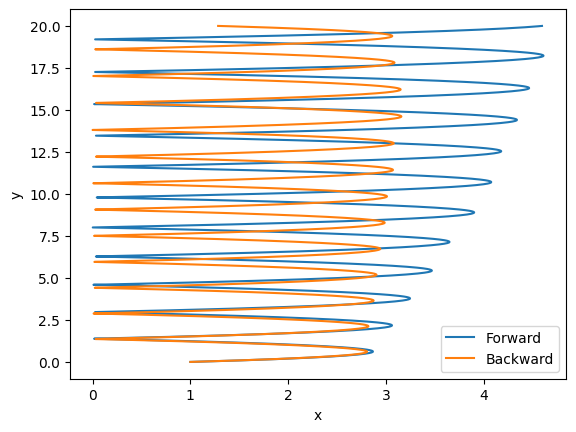

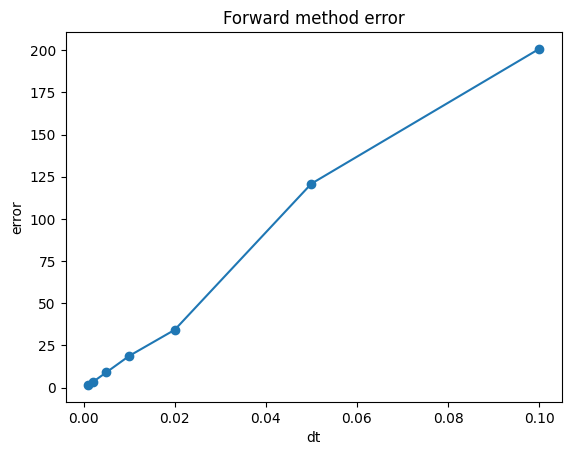

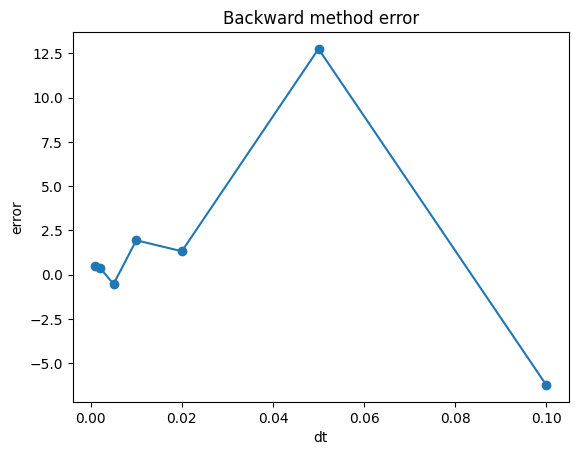

In [3]:
import matplotlib.pyplot as plt

g=9.8

def energy(x, y, vx, vy):
  return 0.5*(vx**2 + vy**2) + g*y


def step_forward(x, y, vx, vy, dt):

  ax = 0
  ay = -g

  x_new = x+vx*dt
  y_new = y+vy*dt

  vx_new = vx+ax*dt
  vy_new = vy+ay*dt

  return x_new, y_new, vx_new, vy_new



def step_backward(x, y, vx, vy, dt):

  ax=0
  ay=-g

  vx_new = vx+ax*dt
  vy_new = vy+ay*dt

  x_new = x+vx_new*dt
  y_new = y+vy_new*dt

  return x_new, y_new, vx_new, vy_new



def bounce(x, y, vx, vy):

  if y<0:
    y=-y
    vy=-vy

  if x<-1:
    x=-1+(-1-x)
    vx=-vx

  if x>5:
    x=5-(x-5)
    vx=-vx

  return x, y, vx, vy


def run(method, dt):

  T=20
  steps = int(T/dt)

  x=0
  y=1
  vx=2
  vy=6

  x_list=[]
  y_list=[]
  t_list=[]
  E_list=[]

  E0 = energy(x,y,vx,vy)

  for i in range(steps):

    t = i*dt

    x_list.append(x)
    y_list.append(y)
    t_list.append(t)
    E_list.append(energy(x,y,vx,vy))

    if method == "forward":
      x, y, vx, vy = step_forward(x, y, vx, vy, dt)

    if method == "backward":
      x, y, vx, vy = step_backward(x, y, vx, vy, dt)

    x, y, vx, vy = bounce(x, y, vx, vy)

  final_error = E_list[-1]-E0

  return x_list, y_list, t_list, E_list, final_error

dt = 0.01

tF,xF,yF,EF,errF = run("forward", dt)
tB,xB,yB,EB,errB = run("backward", dt)

print("Forward error=", errF)
print("Backward error=", errB)



plt.plot(xF, yF, label="Forward")
plt.plot(xB, yB, label="Backward")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


dt_values = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]

forward_errors = []
backward_errors = []

for dt in dt_values:

  a,b,c,d,err = run("forward", dt)
  forward_errors.append(err)

  a,b,c,d,err = run("backward", dt)
  backward_errors.append(err)


plt.plot(dt_values, forward_errors, "o-")
plt.xlabel("dt")
plt.ylabel("error")
plt.title("Forward method error")
plt.show()

plt.plot(dt_values, backward_errors, "o-")
plt.xlabel("dt")
plt.ylabel("error")
plt.title("Backward method error")
plt.show()

